In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [42]:
df = pd.read_csv("../data/county_2016_preprocessed1.csv")
df.head()

,FIPS,County,DEM,GOP,MedianIncome,MigraRate,BirthRate,DeathRate,BachelorRate,UnemploymentRate,State,zip,primary_city,latitude,longitude,estimated_population
0,1001,Autauga,5908.0,18110.0,"54,487",5.3,12.2,10.0,27.7,5.1,AL,36003.0,Autaugaville,32.43,-86.65,1628.0
1,1003,Baldwin,18409.0,72780.0,"56,460",21.5,11.2,9.8,31.3,5.3,AL,31034.0,Hardwick,32.99,-83.29,1741.0
2,1005,Barbour,4848.0,5431.0,"32,884",-18.2,10.6,10.8,12.2,8.3,AL,26238.0,Volga,39.06,-80.11,698.0
3,1007,Bibb,1874.0,6733.0,"43,079",-0.8,12.1,10.8,11.5,6.4,AL,31052.0,Lizella,32.76,-83.86,7592.0
4,1009,Blount,2150.0,22808.0,"47,213",-1.0,12.2,11.2,12.6,5.4,AL,35013.0,Allgood,33.90,-86.51,0.0


In [43]:
len(df)

3143

In [44]:
# for x in range(0,len(df)):
#     if pd.isna(df['DEM'][x]):
#         print(df['County'][x])

In [45]:
df = df.dropna()
len(df)

3050

In [46]:
df['DEM'] = df['DEM'].astype('int32')
df['GOP'] = df['GOP'].astype('int32')

In [47]:
df['MedianIncome'] = df['MedianIncome'].replace(',','', regex=True)
df['MedianIncome'] = df['MedianIncome'].astype('int32')

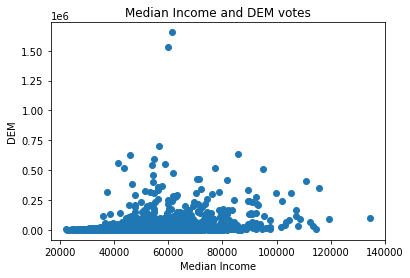

In [48]:
plt.scatter(df['MedianIncome'], df['DEM'])

plt.title('Median Income and DEM votes')
plt.xlabel('Median Income')
plt.ylabel('DEM')

plt.show()

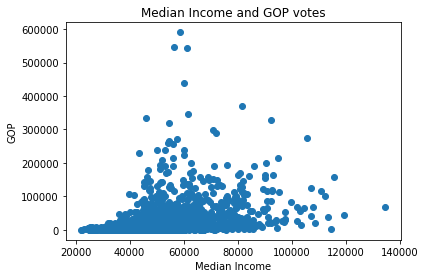

In [49]:
plt.scatter(df['MedianIncome'], df['GOP'])

plt.title('Median Income and GOP votes')
plt.xlabel('Median Income')
plt.ylabel('GOP')

plt.show()

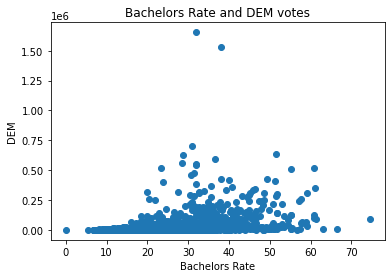

In [51]:
plt.scatter(df['BachelorRate'], df['DEM'])

plt.title('Bachelors Rate and DEM votes')
plt.xlabel('Bachelors Rate')
plt.ylabel('DEM')

plt.show()

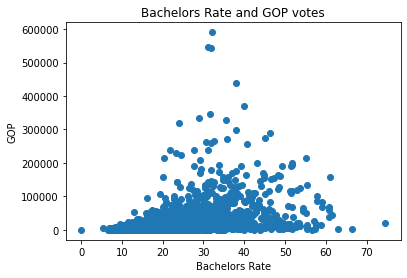

In [52]:
plt.scatter(df['BachelorRate'], df['GOP'])

plt.title('Bachelors Rate and GOP votes')
plt.xlabel('Bachelors Rate')
plt.ylabel('GOP')

plt.show()

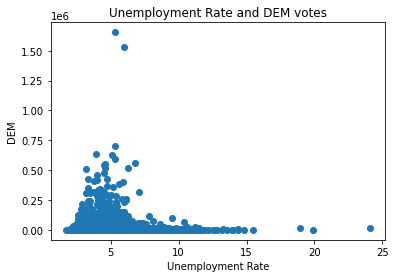

In [53]:
plt.scatter(df['UnemploymentRate'], df['DEM'])

plt.title('Unemployment Rate and DEM votes')
plt.xlabel('Unemployment Rate')
plt.ylabel('DEM')

plt.show()

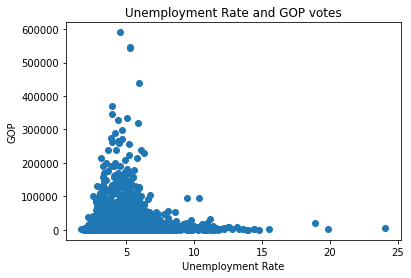

In [54]:
plt.scatter(df['UnemploymentRate'], df['GOP'])

plt.title('Unemployment Rate and GOP votes')
plt.xlabel('Unemployment Rate')
plt.ylabel('GOP')

plt.show()

Maybe predict larger portion of votes?

In [68]:
#Dummy Encoding
df['DEMWin']=0
df['GOPWin']=0
for idx, row in df.iterrows():
    if row['DEM'] >= row['GOP']:
        df['DEMWin'][idx]=1
    else:
        df['GOPWin'][idx]=1

<ipython-input-68-8116353df6b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GOPWin'][idx]=1
<ipython-input-68-8116353df6b6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEMWin'][idx]=1


In [69]:
df

,FIPS,County,DEM,GOP,MedianIncome,MigraRate,BirthRate,DeathRate,BachelorRate,UnemploymentRate,State,zip,primary_city,latitude,longitude,estimated_population,DEMWin,GOPWin
0,1001,Autauga,5908,18110,54487,5.3,12.2,10.0,27.7,5.1,AL,36003.0,Autaugaville,32.43,-86.65,1628.0,0,1
1,1003,Baldwin,18409,72780,56460,21.5,11.2,9.8,31.3,5.3,AL,31034.0,Hardwick,32.99,-83.29,1741.0,0,1
2,1005,Barbour,4848,5431,32884,-18.2,10.6,10.8,12.2,8.3,AL,26238.0,Volga,39.06,-80.11,698.0,0,1
3,1007,Bibb,1874,6733,43079,-0.8,12.1,10.8,11.5,6.4,AL,31052.0,Lizella,32.76,-83.86,7592.0,0,1
4,1009,Blount,2150,22808,47213,-1.0,12.2,11.2,12.6,5.4,AL,35013.0,Allgood,33.90,-86.51,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,Sweetwater,3233,12153,74546,-17.9,14.0,6.8,22.0,6.1,WY,82322.0,Bairoil,42.23,-107.55,0.0,0,1
3139,56039,Teton,7313,3920,84118,-0.5,11.0,4.2,57.4,3.5,WY,59419.0,Bynum,48.04,-112.38,0.0,1,0
3140,56041,Uinta,1202,6154,64713,-11.3,14.3,6.9,15.4,5.8,WY,82930.0,Evanston,41.25,-110.96,10825.0,0,1
3141,56043,Washakie,532,2911,49533,-15.2,10.8,9.4,21.5,4.8,WY,82401.0,Worland,44.00,-107.95,6629.0,0,1


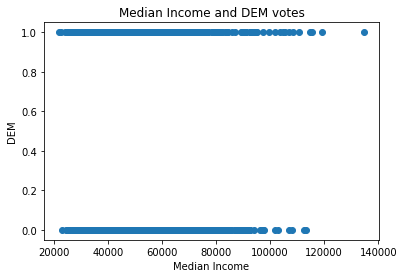

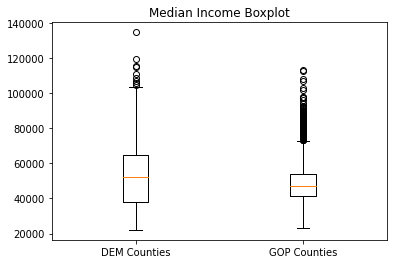

In [94]:
plt.scatter(df['MedianIncome'], df['DEMWin'])

plt.title('Median Income and DEM votes')
plt.xlabel('Median Income')
plt.ylabel('DEM')

plt.show()

bp = plt.boxplot([df.loc[df['DEMWin'] == 1]['MedianIncome'], df.loc[df['DEMWin'] == 0]['MedianIncome']])
plt.title('Median Income Boxplot')
plt.xticks([1,2],['DEM Counties','GOP Counties'])

plt.show()

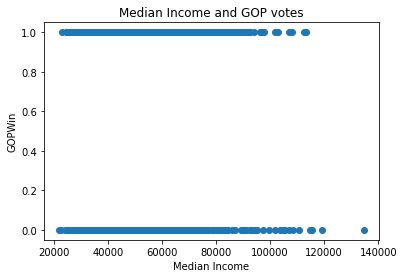

In [95]:
plt.scatter(df['MedianIncome'], df['GOPWin'])

plt.title('Median Income and GOP votes')
plt.xlabel('Median Income')
plt.ylabel('GOPWin')

plt.show()

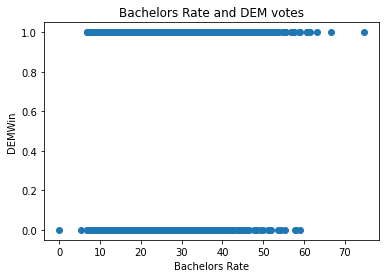

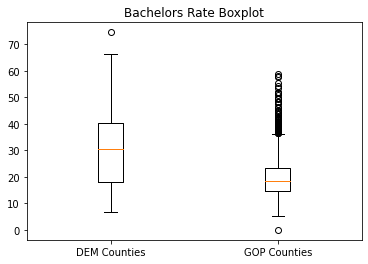

In [96]:
plt.scatter(df['BachelorRate'], df['DEMWin'])

plt.title('Bachelors Rate and DEM votes')
plt.xlabel('Bachelors Rate')
plt.ylabel('DEMWin')

plt.show()

bp = plt.boxplot([df.loc[df['DEMWin'] == 1]['BachelorRate'], df.loc[df['DEMWin'] == 0]['BachelorRate']])
plt.title('Bachelors Rate Boxplot')
plt.xticks([1,2],['DEM Counties','GOP Counties'])

plt.show()

Bachelors Rate looks like it has some come relation.

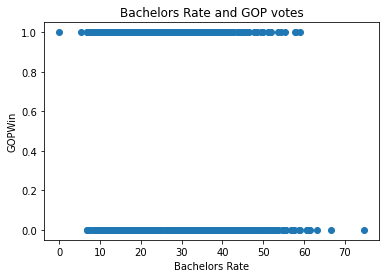

In [97]:
plt.scatter(df['BachelorRate'], df['GOPWin'])

plt.title('Bachelors Rate and GOP votes')
plt.xlabel('Bachelors Rate')
plt.ylabel('GOPWin')

plt.show()

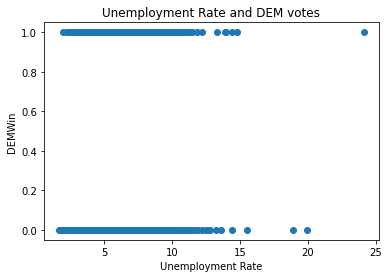

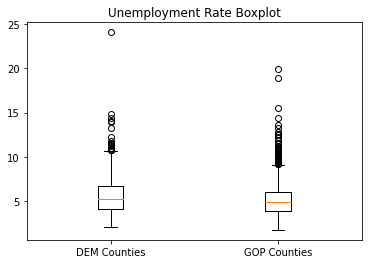

In [98]:
plt.scatter(df['UnemploymentRate'], df['DEMWin'])

plt.title('Unemployment Rate and DEM votes')
plt.xlabel('Unemployment Rate')
plt.ylabel('DEMWin')

plt.show()

bp = plt.boxplot([df.loc[df['DEMWin'] == 1]['UnemploymentRate'], df.loc[df['DEMWin'] == 0]['UnemploymentRate']])
plt.title('Unemployment Rate Boxplot')
plt.xticks([1,2],['DEM Counties','GOP Counties'])

plt.show()

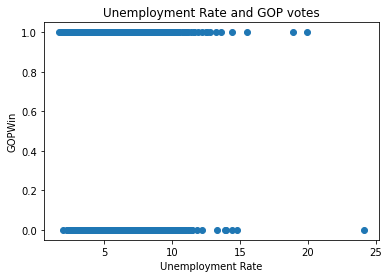

In [75]:
plt.scatter(df['UnemploymentRate'], df['GOPWin'])

plt.title('Unemployment Rate and GOP votes')
plt.xlabel('Unemployment Rate')
plt.ylabel('GOPWin')

plt.show()

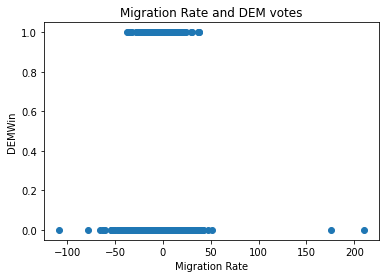

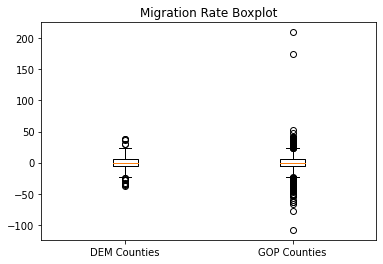

In [99]:
plt.scatter(df['MigraRate'], df['DEMWin'])

plt.title('Migration Rate and DEM votes')
plt.xlabel('Migration Rate')
plt.ylabel('DEMWin')

plt.show()

bp = plt.boxplot([df.loc[df['DEMWin'] == 1]['MigraRate'], df.loc[df['DEMWin'] == 0]['MigraRate']])
plt.title('Migration Rate Boxplot')
plt.xticks([1,2],['DEM Counties','GOP Counties'])

plt.show()

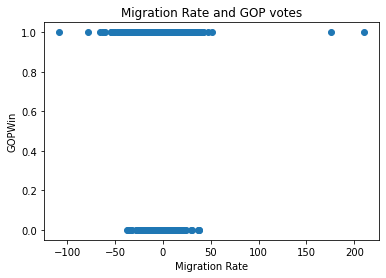

In [100]:
plt.scatter(df['MigraRate'], df['GOPWin'])

plt.title('Migration Rate and GOP votes')
plt.xlabel('Migration Rate')
plt.ylabel('GOPWin')

plt.show()

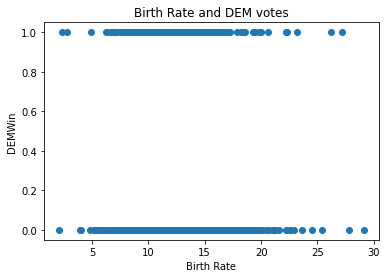

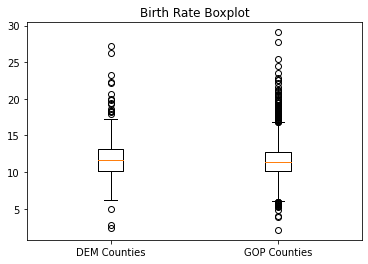

In [101]:
plt.scatter(df['BirthRate'], df['DEMWin'])

plt.title('Birth Rate and DEM votes')
plt.xlabel('Birth Rate')
plt.ylabel('DEMWin')

plt.show()

bp = plt.boxplot([df.loc[df['DEMWin'] == 1]['BirthRate'], df.loc[df['DEMWin'] == 0]['BirthRate']])
plt.title('Birth Rate Boxplot')
plt.xticks([1,2],['DEM Counties','GOP Counties'])

plt.show()

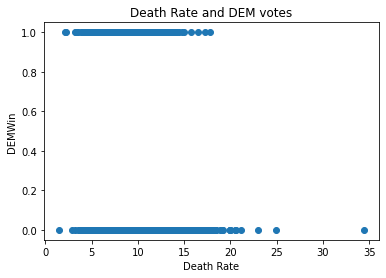

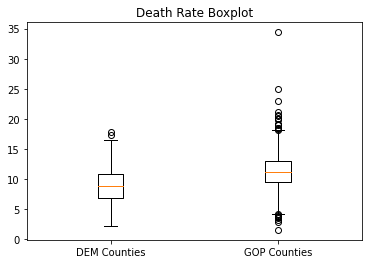

In [102]:
plt.scatter(df['DeathRate'], df['DEMWin'])

plt.title('Death Rate and DEM votes')
plt.xlabel('Death Rate')
plt.ylabel('DEMWin')

plt.show()

bp = plt.boxplot([df.loc[df['DEMWin'] == 1]['DeathRate'], df.loc[df['DEMWin'] == 0]['DeathRate']])
plt.title('Death Rate Boxplot')
plt.xticks([1,2],['DEM Counties','GOP Counties'])

plt.show()

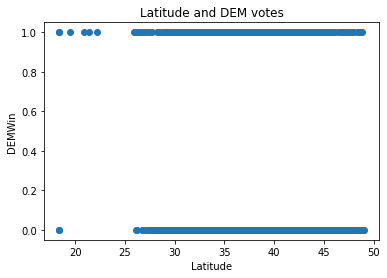

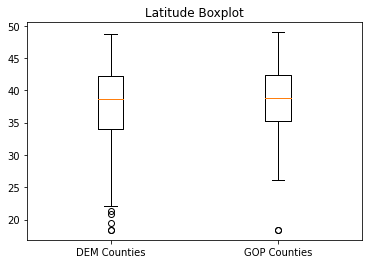

In [103]:
plt.scatter(df['latitude'], df['DEMWin'])

plt.title('Latitude and DEM votes')
plt.xlabel('Latitude')
plt.ylabel('DEMWin')

plt.show()

bp = plt.boxplot([df.loc[df['DEMWin'] == 1]['latitude'], df.loc[df['DEMWin'] == 0]['latitude']])
plt.title('Latitude Boxplot')
plt.xticks([1,2],['DEM Counties','GOP Counties'])

plt.show()

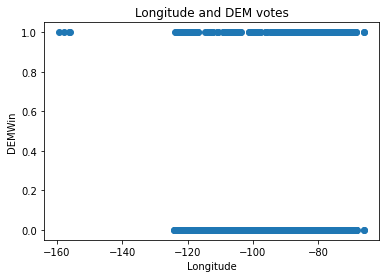

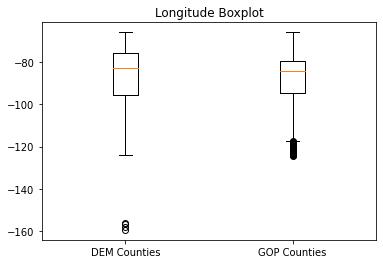

In [104]:
plt.scatter(df['longitude'], df['DEMWin'])

plt.title('Longitude and DEM votes')
plt.xlabel('Longitude')
plt.ylabel('DEMWin')

plt.show()

bp = plt.boxplot([df.loc[df['DEMWin'] == 1]['longitude'], df.loc[df['DEMWin'] == 0]['longitude']])
plt.title('Longitude Boxplot')
plt.xticks([1,2],['DEM Counties','GOP Counties'])

plt.show()

Regress on ratio???

In [76]:
df['DEM/GOP']=df['DEM']/df["GOP"]

In [77]:
df

,FIPS,County,DEM,GOP,MedianIncome,MigraRate,BirthRate,DeathRate,BachelorRate,UnemploymentRate,State,zip,primary_city,latitude,longitude,estimated_population,DEMWin,GOPWin,DEM/GOP
0,1001,Autauga,5908,18110,54487,5.3,12.2,10.0,27.7,5.1,AL,36003.0,Autaugaville,32.43,-86.65,1628.0,0,1,0.326229
1,1003,Baldwin,18409,72780,56460,21.5,11.2,9.8,31.3,5.3,AL,31034.0,Hardwick,32.99,-83.29,1741.0,0,1,0.252940
2,1005,Barbour,4848,5431,32884,-18.2,10.6,10.8,12.2,8.3,AL,26238.0,Volga,39.06,-80.11,698.0,0,1,0.892653
3,1007,Bibb,1874,6733,43079,-0.8,12.1,10.8,11.5,6.4,AL,31052.0,Lizella,32.76,-83.86,7592.0,0,1,0.278331
4,1009,Blount,2150,22808,47213,-1.0,12.2,11.2,12.6,5.4,AL,35013.0,Allgood,33.90,-86.51,0.0,0,1,0.094265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,Sweetwater,3233,12153,74546,-17.9,14.0,6.8,22.0,6.1,WY,82322.0,Bairoil,42.23,-107.55,0.0,0,1,0.266025
3139,56039,Teton,7313,3920,84118,-0.5,11.0,4.2,57.4,3.5,WY,59419.0,Bynum,48.04,-112.38,0.0,1,0,1.865561
3140,56041,Uinta,1202,6154,64713,-11.3,14.3,6.9,15.4,5.8,WY,82930.0,Evanston,41.25,-110.96,10825.0,0,1,0.195320
3141,56043,Washakie,532,2911,49533,-15.2,10.8,9.4,21.5,4.8,WY,82401.0,Worland,44.00,-107.95,6629.0,0,1,0.182755


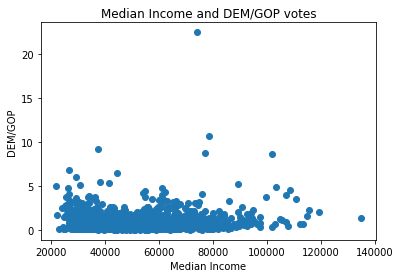

In [78]:
plt.scatter(df['MedianIncome'], df['DEM/GOP'])

plt.title('Median Income and DEM/GOP votes')
plt.xlabel('Median Income')
plt.ylabel('DEM/GOP')

plt.show()

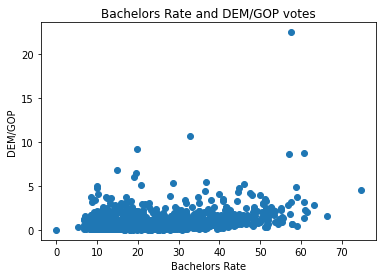

In [79]:
plt.scatter(df['BachelorRate'], df['DEM/GOP'])

plt.title('Bachelors Rate and DEM/GOP votes')
plt.xlabel('Bachelors Rate')
plt.ylabel('DEM/GOP')

plt.show()

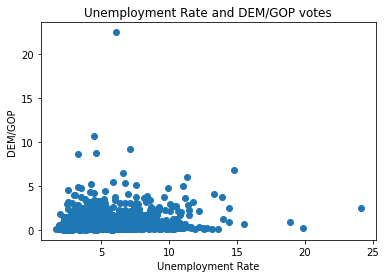

In [80]:
plt.scatter(df['UnemploymentRate'], df['DEM/GOP'])

plt.title('Unemployment Rate and DEM/GOP votes')
plt.xlabel('Unemployment Rate')
plt.ylabel('DEM/GOP')

plt.show()

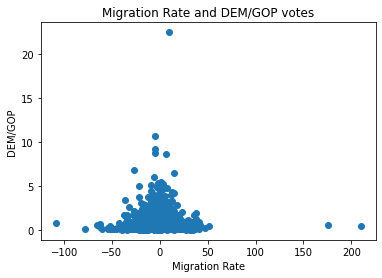

In [86]:
plt.scatter(df['MigraRate'], df['DEM/GOP'])

plt.title('Migration Rate and DEM/GOP votes')
plt.xlabel('Migration Rate')
plt.ylabel('DEM/GOP')

plt.show()

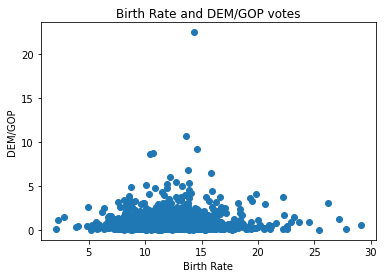

In [87]:
plt.scatter(df['BirthRate'], df['DEM/GOP'])

plt.title('Birth Rate and DEM/GOP votes')
plt.xlabel('Birth Rate')
plt.ylabel('DEM/GOP')

plt.show()

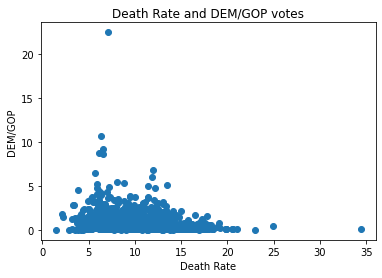

In [88]:
plt.scatter(df['DeathRate'], df['DEM/GOP'])

plt.title('Death Rate and DEM/GOP votes')
plt.xlabel('Death Rate')
plt.ylabel('DEM/GOP')

plt.show()

Binary graph looks like it has some correlation, attempt for classification:

In [105]:
df.columns

Index(['FIPS', 'County', 'DEM', 'GOP', 'MedianIncome', 'MigraRate',
       'BirthRate', 'DeathRate', 'BachelorRate', 'UnemploymentRate', 'State',
       'zip', 'primary_city', 'latitude', 'longitude', 'estimated_population',
       'DEMWin', 'GOPWin', 'DEM/GOP'],
      dtype='object')

In [111]:
X = df[['BachelorRate', 'MedianIncome', 'DeathRate', 'DeathRate']].copy()
y = df['DEMWin']

KNN?

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# fit data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier()
model.fit(x_train, y_train)

# generate predictions
predictions = model.predict(x_test)

# test accuracy
accuracy_score(y_test, predictions)

0.8524590163934426

In [140]:
X = df[['BachelorRate', 'MedianIncome', 'DeathRate', 'DeathRate', 'latitude', 'longitude']].copy()
y = df['DEMWin']

In [141]:
# fit data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier()
model.fit(x_train, y_train)

# generate predictions
predictions = model.predict(x_test)

# test accuracy
accuracy_score(y_test, predictions)

0.8557377049180328

wtf bro

lets do valiadation

In [142]:
accuracy=[]
for k in range(1,31):
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy.append(accuracy_score(predictions, y_test))

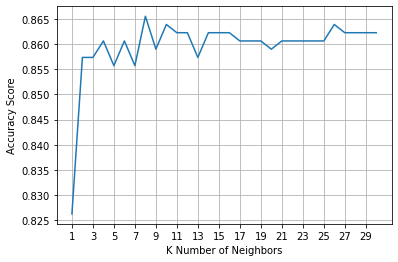

In [143]:
plt.plot(range(1,31),accuracy)
plt.xticks(range(1,31,2),range(1,31,2))
plt.xlabel("K Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.grid()

TODO tests lol

Now maybe logistic regression?

In [144]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(X_train,y_train)

# build model and fit on train set
logit = LogisticRegression()
logit.fit(x_train, y_train)

# make predictions on test set
pred_logit = logit.predict(x_test)

# measure accuracy
accuracy_score(y_true = y_test, y_pred = pred_logit)

0.8704918032786885

a bit better i guess but let's try decision trees as well

In [145]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

kfold = model_selection.KFold(n_splits=50, shuffle=True, random_state=7)

model = DecisionTreeClassifier()

results = model_selection.cross_val_score(model, X, y, cv=kfold)

result_mean = results.mean()
result_variance = results.var()
print(result_mean)
print(result_variance)

0.8390163934426229
0.0021466272507390484


hmmm a bit lower, but what if we use random forest or bagging/boosting/stacking?

In [146]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, max_features=4)

results_2 = model_selection.cross_val_score(model, X, y, cv=kfold)

result2_mean = results_2.mean()
result2_variance = results_2.var()
print(result2_mean)
print(result2_variance)

0.8918032786885246
0.0014619725880139754


lol seems to be very slightly our best model so far -- try bagging/boosting/stacking

NOTE still need to tackle actual question laTeR

Boosting: gradient boost and adaboost

In [147]:
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier

boosted_tree = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", 
                                  n_estimators=50, random_state = 7)
model = boosted_tree.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8868852459016393

In [148]:
#stochastic gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosted_tree = GradientBoostingClassifier(n_estimators=50, random_state=7)
model = gradient_boosted_tree.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8967213114754098

wtf dis best

TODO stacking

In [149]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 4)
split1, split2, split3, split4 = kf.split(x_train, y_train)

# kNN - uses first fold
x_train_kNN = x_train.iloc[split1[0]]
x_test_kNN = x_train.iloc[split1[1]]
y_train_kNN = y_train.iloc[split1[0]]
y_test_kNN = y_train.iloc[split1[1]]

kNN = KNeighborsClassifier()
kNN.fit(x_train_kNN, y_train_kNN)
kNN_pred = kNN.predict(x_test_kNN) # TO DO: Predict values

# TO DO: Find and print the score for kNN
kNN_score = (y_test_kNN == kNN_pred).sum() / len(kNN_pred)
print("kNN: " + str(kNN_score))

kNN: 0.8163934426229508


In [133]:
# SVM - uses second fold
x_train_SVM = x_train.iloc[split2[0]]
x_test_SVM = x_train.iloc[split2[1]]
y_train_SVM = y_train.iloc[split2[0]]
y_test_SVM = y_train.iloc[split2[1]]

from sklearn import svm
# TO DO: Create model (Initialize and fit) and predict
SVM = svm.SVC()
SVM.fit(x_train_SVM, y_train_SVM)
SVM_pred = SVM.predict(x_test_SVM) # TO DO: Predict values

# TO DO: Find and print the score for SVM
SVM_score = (y_test_SVM == SVM_pred).sum() / len(SVM_pred)
print("SVM: " + str(SVM_score))

SVM: 0.8524590163934426


In [134]:
# decision tree - uses third fold
x_train_tree = x_train.iloc[split3[0]]
x_test_tree = x_train.iloc[split3[1]]
y_train_tree = y_train.iloc[split3[0]]
y_test_tree = y_train.iloc[split3[1]]

from sklearn.tree import DecisionTreeClassifier
# TO DO: Create model (Initialize and fit) and predict
tree = DecisionTreeClassifier()
tree.fit(x_train_tree, y_train_tree)
tree_pred = tree.predict(x_test_tree) # TO DO: Predict values

# TO DO: Find and print the score for Decision Tree
tree_score = (y_test_tree == tree_pred).sum() / len(tree_pred)
print("Decision Tree: " + str(tree_score))

Decision Tree: 0.8459016393442623


In [136]:
# logistic - uses fourth fold
# TO DO: Use the fourth fold to split into train and test sets
x_train_logit = x_train.iloc[split4[0]]
x_test_logit = x_train.iloc[split4[1]]
y_train_logit = y_train.iloc[split4[0]]
y_test_logit = y_train.iloc[split4[1]]

from sklearn.linear_model import LogisticRegression
# TO DO: Create model (Initialize and fit) and predict
logit = LogisticRegression()
logit.fit(x_train_logit, y_train_logit)
logit_pred = logit.predict(x_test_logit) # TO DO: Predict values

# TO DO: Find and print the score for Logistic regression
logit_score = (y_test_logit == logit_pred).sum() / len(logit_pred)
print("Logistic Regression: " + str(logit_score))

Logistic Regression: 0.8704918032786885


In [139]:
# Stacking
# Combines the four folds
import numpy as np
kNN_pred = kNN_pred.reshape(-1,1)
SVM_pred = SVM_pred.reshape(-1,1)
tree_pred = tree_pred.reshape(-1,1)
logit_pred = logit_pred.reshape(-1,1)
pred_input = np.vstack([kNN_pred, SVM_pred, tree_pred, logit_pred])

from sklearn.linear_model import LogisticRegression
stacked = LogisticRegression()
stacked.fit(pred_input, y_train)

# the first layer predicts
pred_test = pd.DataFrame({'kNN': kNN.predict(x_test), 'SVM': SVM.predict(x_test), 'tree': tree.predict(x_test), 'logit': logit.predict(x_test)})
# the average of the predictions is calculated
pred_test = pred_test.assign(avg=pred_test.mean(axis=1))
stacked_pred = stacked.predict(pred_test[['avg']])

stacked_score = (y_test == stacked_pred).sum() / len(stacked_pred)
print("Stacked: " + str(stacked_score))

Stacked: 0.8540983606557377


just testing how baseline linear regression performs lol

In [151]:
df['BachelorRate']

0       27.7
1       31.3
2       12.2
3       11.5
4       12.6
        ... 
3138    22.0
3139    57.4
3140    15.4
3141    21.5
3142    19.2
Name: BachelorRate, Length: 3050, dtype: float64

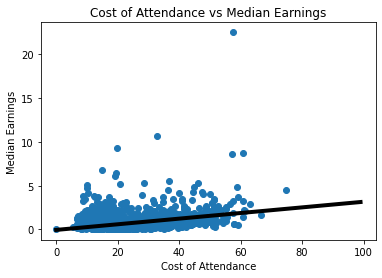

In [152]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(df[['BachelorRate']], df[['DEM/GOP']])

# generate numbers across the spread of data
test = pd.DataFrame({'cost': pd.Series(range(0, 100, 1))})
# predict on that spread
predictions = model.predict(test)

plt.scatter(df[['BachelorRate']], df[['DEM/GOP']])
plt.plot(test, predictions, 'k', linewidth=4)
plt.title('Cost of Attendance vs Median Earnings')
plt.xlabel('Cost of Attendance')
plt.ylabel('Median Earnings')
plt.show()

In [153]:
x_train, x_test, y_train, y_test = train_test_split(df[['BachelorRate']], df[['DEM/GOP']], test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.12444621759772811

bruh

what about poly

In [157]:
# Import the models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Build the Models
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())

# Using the same split, fit and score the model
poly_model.fit(x_train, y_train)
poly_model.score(x_test, y_test)

0.19659176717919902

In [158]:
# Import the models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Build the Models
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())

# Using the same split, fit and score the model
poly_model.fit(x_train, y_train)
poly_model.score(x_test, y_test)

0.1925058551524378

idk man plz 